In [37]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image

In [38]:
# Define paths for your dataset
train_dir = r'D:\Download\zyFile\Machine_Vision\MV_Seminar_Week 2\Machine_Vision_homework\MV_Seminar Week 5\data_mv\train'
test_dir = r'D:\Download\zyFile\Machine_Vision\MV_Seminar_Week 2\Machine_Vision_homework\MV_Seminar Week 5\data_mv\test'

In [39]:
# Image preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,  # Specify the validation split here
    fill_mode='nearest'
)

In [40]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load and preprocess the training and testing images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=8,
    class_mode='categorical',
    subset='training'  # Use 'training' subset for training data
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Use 'validation' subset for validation data
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=8,
    class_mode='categorical'
)

Found 39 images belonging to 3 classes.
Found 9 images belonging to 3 classes.
Found 24 images belonging to 3 classes.


In [41]:
# Build a neural network model
model = Sequential([
    Flatten(input_shape=(128, 128, 3)),
    Dense(units=512, activation='relu'),
    Dropout(0.2),
    Dense(units=256, activation='relu'),
    Dropout(0.2),
    Dense(units=3, activation='softmax')
])

In [42]:
# Display the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 49152)             0         
                                                                 
 dense_6 (Dense)             (None, 512)               25166336  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 3)                 771       
                                                                 
Total params: 25,298,435
Trainable params: 25,298,435


In [43]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
# Fit the model for training 
history = model.fit(train_generator, epochs=100, validation_data=validation_generator)

Epoch 1/100
5/5 [==============================] - 1s 105ms/step - loss: 3.6707 - accuracy: 0.2564 - val_loss: 2.9145 - val_accuracy: 0.3333
Epoch 2/100
5/5 [==============================] - 0s 49ms/step - loss: 3.5452 - accuracy: 0.2051 - val_loss: 2.0624 - val_accuracy: 0.3333
Epoch 3/100
5/5 [==============================] - 0s 55ms/step - loss: 2.3194 - accuracy: 0.3590 - val_loss: 2.3123 - val_accuracy: 0.3333
Epoch 4/100
5/5 [==============================] - 0s 45ms/step - loss: 3.1858 - accuracy: 0.4872 - val_loss: 1.6419 - val_accuracy: 0.5556
Epoch 5/100
5/5 [==============================] - 0s 54ms/step - loss: 2.8055 - accuracy: 0.3846 - val_loss: 1.1302 - val_accuracy: 0.3333
Epoch 6/100
5/5 [==============================] - 0s 50ms/step - loss: 2.8580 - accuracy: 0.3590 - val_loss: 1.2251 - val_accuracy: 0.5556
Epoch 7/100
5/5 [==============================] - 0s 51ms/step - loss: 1.8414 - accuracy: 0.5128 - val_loss: 1.5544 - val_accuracy: 0.4444
Epoch 8/100
5/5 [==

In [45]:
# Save the trained model
model.save('cat_dog_face_model.h5')

Text(0, 0.5, 'Accuracy')

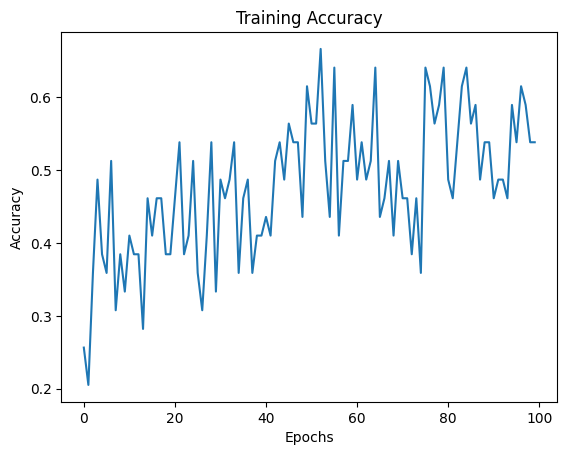

In [46]:
# Plot the training and validation Accuracy curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

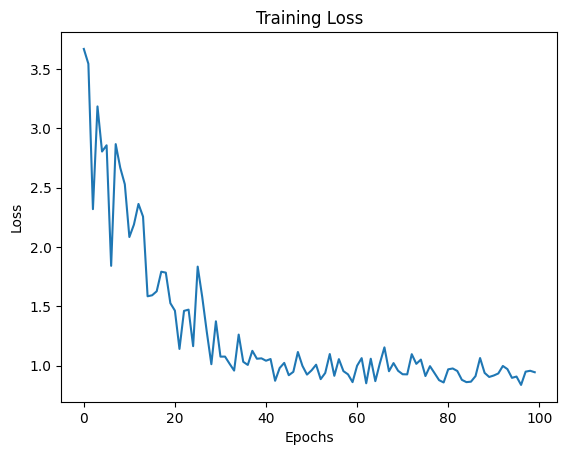

In [47]:
# Plot the training and validation loss curves
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [48]:
# Load the trained model
model = load_model('cat_dog_face_model.h5')  # Replace with the path to your trained model file

In [49]:
# Make predictions on the test data
predictions = model.predict(test_generator)
# 'predictions' will contain the predicted probabilities for each class for each sample in the test data

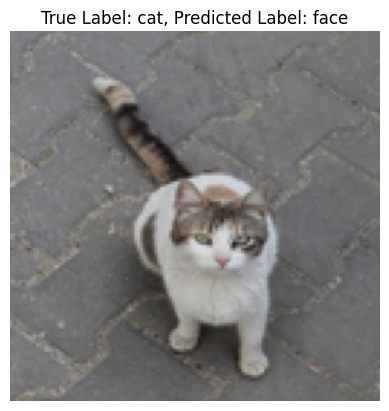

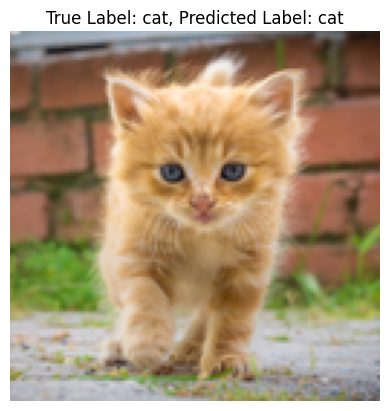

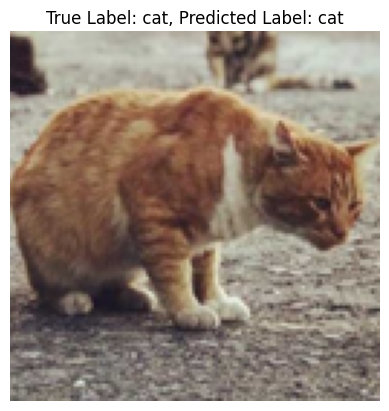

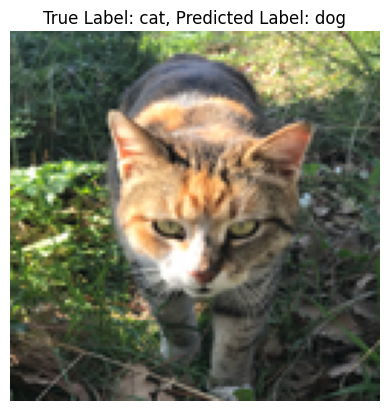

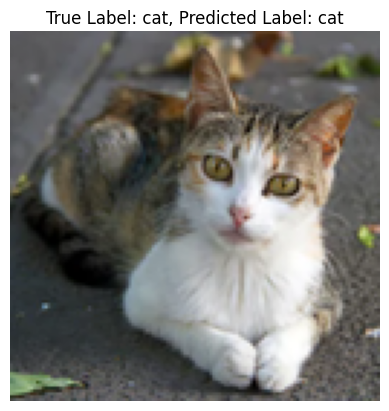

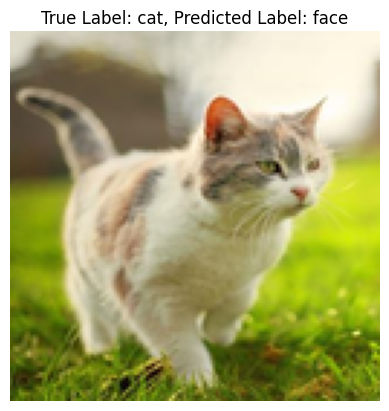

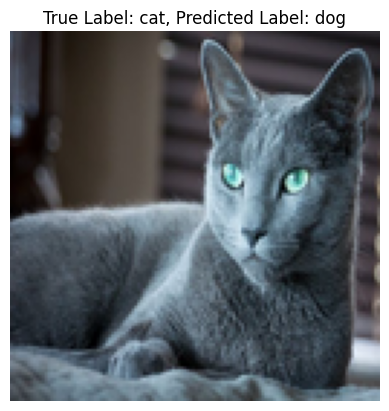

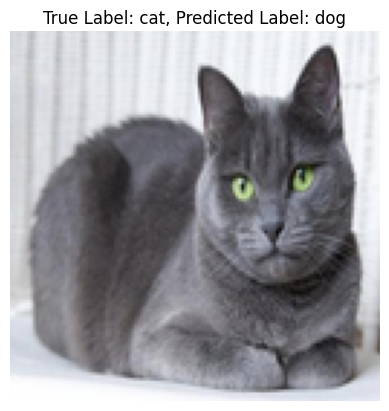

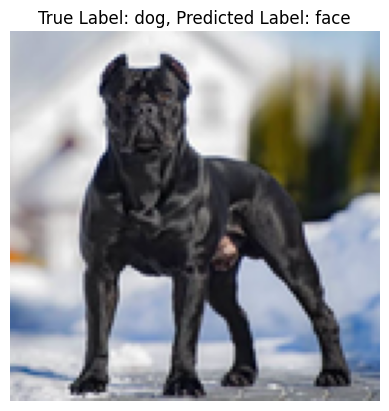

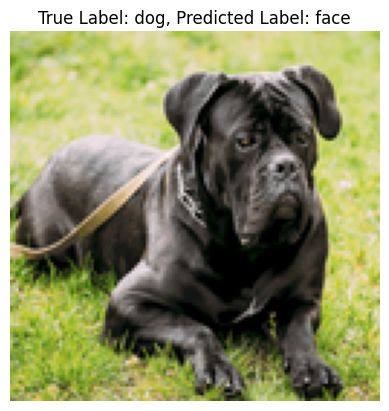

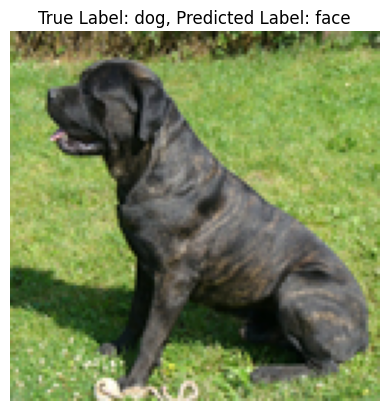

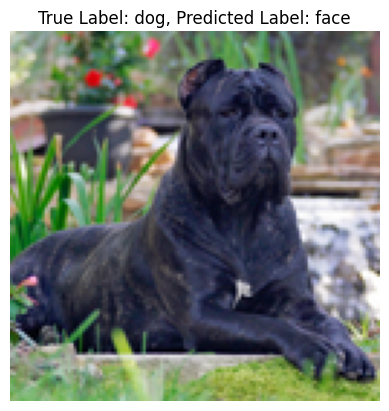

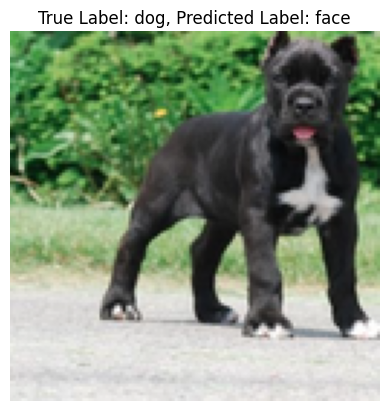

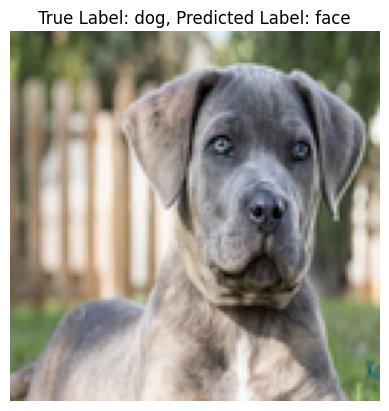

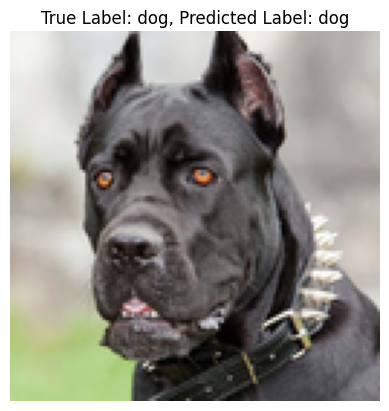

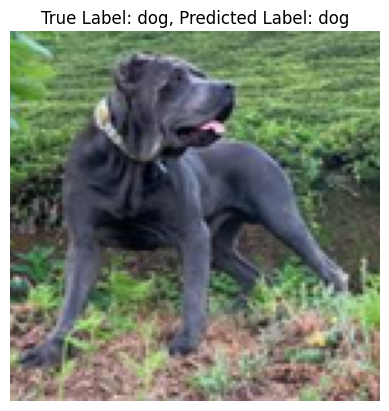

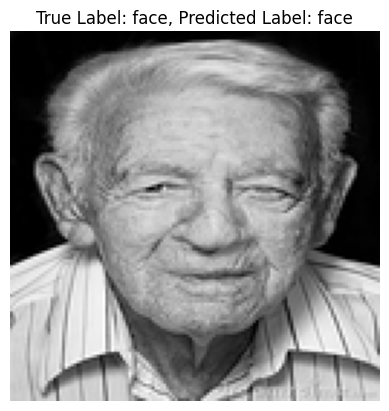

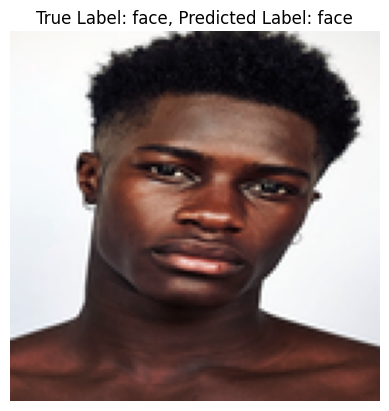

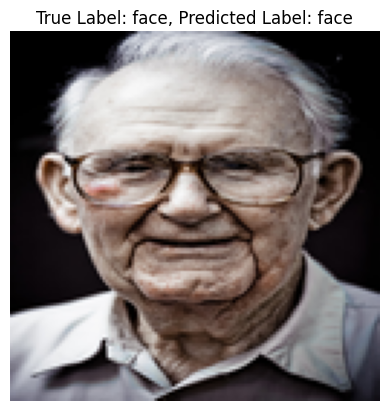

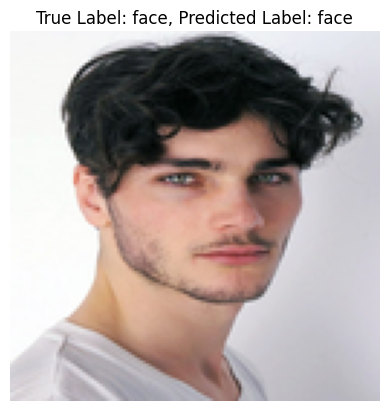

In [50]:
from tensorflow.keras.preprocessing import image
# Retrieve the true class labels
true_labels = test_generator.classes

# Get the class labels
class_labels = list(test_generator.class_indices.keys())

# Display the first few images with true and predicted labels
for i in range(20):  # Display the first 5 images (you can change this number)
    plt.figure()
    plt.imshow(image.load_img(os.path.join(test_dir, test_generator.filenames[i])))
    plt.title(f"True Label: {class_labels[true_labels[i]]}, Predicted Label: {class_labels[np.argmax(predictions[i])]}")
    plt.axis('off')
    plt.show()
